In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

In [2]:
df = pd.read_csv('../bagging/car_sensors.csv')
df.head()

,safe,S1,S2,S3,S4,S5,S6,S7,S8,S9,...,S13,S14,S15,S16,S17,S18,S19,S20,S21,S22
0,1,36.2247,10.77330,0.243897,596,100.6710,0.0,0.0,1,28,...,1,57,0.0,0.280,240,5.99375,0,0.0,4,14.9382
1,1,35.7343,17.45510,0.243897,600,100.0000,0.0,0.0,1,14,...,1,57,0.0,0.175,240,5.99375,0,0.0,4,14.8827
2,1,31.6561,7.61366,0.308763,604,99.3377,0.0,0.0,1,4,...,1,58,0.0,0.280,240,5.99375,0,0.0,4,14.6005
3,1,33.8320,13.11190,0.293195,616,97.4026,0.0,0.0,1,8,...,1,58,0.0,0.385,240,4.50625,0,13.0,4,14.6782
4,1,42.5138,13.99850,0.259465,632,94.9367,0.0,0.0,1,8,...,1,57,0.0,0.070,240,5.99375,0,19.5,4,15.3461


In [11]:
df['safe'].value_counts()


safe_pct =  (df['safe'].value_counts()[1] / df.shape[0] ) * 100
unsafe_pct = (df['safe'].value_counts()[0] / df.shape[0]) * 100

print(f"Safe percentage: {safe_pct:.2f}%")
print(f"Unsafe percentage: {unsafe_pct:.2f}%")

Safe percentage: 57.58%
Unsafe percentage: 42.42%


In [13]:
df['safe'] = df['safe'].apply(lambda x:1 if x ==1 else -1)


In [14]:
df.head()

,safe,S1,S2,S3,S4,S5,S6,S7,S8,S9,...,S13,S14,S15,S16,S17,S18,S19,S20,S21,S22
0,1,36.2247,10.77330,0.243897,596,100.6710,0.0,0.0,1,28,...,1,57,0.0,0.280,240,5.99375,0,0.0,4,14.9382
1,1,35.7343,17.45510,0.243897,600,100.0000,0.0,0.0,1,14,...,1,57,0.0,0.175,240,5.99375,0,0.0,4,14.8827
2,1,31.6561,7.61366,0.308763,604,99.3377,0.0,0.0,1,4,...,1,58,0.0,0.280,240,5.99375,0,0.0,4,14.6005
3,1,33.8320,13.11190,0.293195,616,97.4026,0.0,0.0,1,8,...,1,58,0.0,0.385,240,4.50625,0,13.0,4,14.6782
4,1,42.5138,13.99850,0.259465,632,94.9367,0.0,0.0,1,8,...,1,57,0.0,0.070,240,5.99375,0,19.5,4,15.3461


In [16]:
df['safe'].value_counts()

safe
 1    19139
-1    14100
Name: count, dtype: int64

In [17]:
X = df.drop('safe', axis=1)
y = df['safe']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# now i have to only work with the training data
X_train['weights'] = 1 / X_train.shape[0]
X_train.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S14,S15,S16,S17,S18,S19,S20,S21,S22,weights
26075,32.3621,9.31503,0.076542,924,64.9351,0.000,0.000,0,0,0.016064,...,70,0.0,-0.07,255,4.50625,0,23.2,4,6.57952,0.000038
17389,32.9355,16.35810,0.094705,848,70.7547,0.000,0.000,0,-8,0.015686,...,60,0.0,0.00,1008,4.50625,0,4.7,4,7.84349,0.000038
3316,35.4346,15.01320,0.096002,936,64.1026,29.919,160.053,0,14,0.016064,...,60,0.0,0.00,240,5.99375,0,0.0,4,8.03351,0.000038
3840,90.8672,7.94825,0.067461,1036,57.9151,0.000,0.000,0,0,0.017324,...,41,0.0,-0.28,240,10.50000,0,0.0,1,11.30890,0.000038
15780,29.8352,13.18670,0.112867,784,76.5306,27.280,249.558,0,0,0.015434,...,67,0.0,0.56,752,9.01250,0,21.7,4,9.55105,0.000038


In [19]:
# training a weak classifier
dt1 = DecisionTreeClassifier(max_depth=1, random_state=42)
dt1.fit(X_train.drop('weights', axis=1), y_train, sample_weight=X_train['weights'])

DecisionTreeClassifier(max_depth=1, random_state=42)

[Text(0.5, 0.75, 'x[12] <= 0.5\ngini = 0.488\nsamples = 26591\nvalue = [0.422, 0.578]'),
 Text(0.25, 0.25, 'gini = 0.142\nsamples = 3204\nvalue = [0.111, 0.009]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.457\nsamples = 23387\nvalue = [0.311, 0.568]'),
 Text(0.625, 0.5, '  False')]

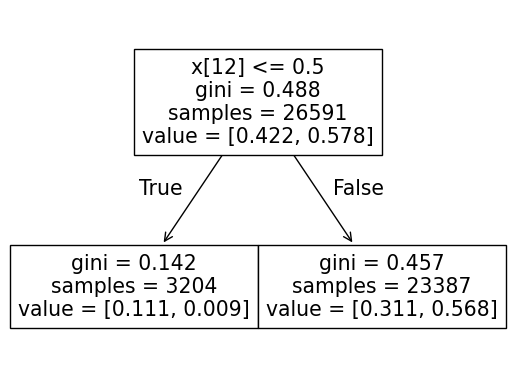

In [21]:
plot_tree(dt1)

In [22]:
X_train['y_pred'] = dt1.predict(X_train.drop('weights', axis=1))
X_train.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S15,S16,S17,S18,S19,S20,S21,S22,weights,y_pred
26075,32.3621,9.31503,0.076542,924,64.9351,0.000,0.000,0,0,0.016064,...,0.0,-0.07,255,4.50625,0,23.2,4,6.57952,0.000038,1
17389,32.9355,16.35810,0.094705,848,70.7547,0.000,0.000,0,-8,0.015686,...,0.0,0.00,1008,4.50625,0,4.7,4,7.84349,0.000038,1
3316,35.4346,15.01320,0.096002,936,64.1026,29.919,160.053,0,14,0.016064,...,0.0,0.00,240,5.99375,0,0.0,4,8.03351,0.000038,1
3840,90.8672,7.94825,0.067461,1036,57.9151,0.000,0.000,0,0,0.017324,...,0.0,-0.28,240,10.50000,0,0.0,1,11.30890,0.000038,1
15780,29.8352,13.18670,0.112867,784,76.5306,27.280,249.558,0,0,0.015434,...,0.0,0.56,752,9.01250,0,21.7,4,9.55105,0.000038,1


In [24]:
X_train['safe'] = y_train.values

error_factor1 = np.where(X_train['y_pred'] != X_train['safe'], X_train['weights'], 0)
e_m1 = error_factor1.sum() / X_train['weights'].sum()

accuracy_factor1 = np.log((1 - e_m1) / e_m1)

print(f"Error rate of weak classifier 1: {e_m1:.4f}")
print(f"Accuracy factor of weak classifier 1: {accuracy_factor1:.4f}")

Error rate of weak classifier 1: 0.3206
Accuracy factor of weak classifier 1: 0.7512


In [32]:
#update weights
def update_weights(df, accuracy_factor):
    if df['safe'] == df['y_pred']:
        return df['weights'] * np.exp(-accuracy_factor) # decrease weight for correct predictions
    else:
        return df['weights'] * np.exp(accuracy_factor) # fucking increase weight for incorrect predictions

In [30]:
X_train.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S16,S17,S18,S19,S20,S21,S22,weights,y_pred,safe
26075,32.3621,9.31503,0.076542,924,64.9351,0.000,0.000,0,0,0.016064,...,-0.07,255,4.50625,0,23.2,4,6.57952,0.000038,1,-1
17389,32.9355,16.35810,0.094705,848,70.7547,0.000,0.000,0,-8,0.015686,...,0.00,1008,4.50625,0,4.7,4,7.84349,0.000038,1,-1
3316,35.4346,15.01320,0.096002,936,64.1026,29.919,160.053,0,14,0.016064,...,0.00,240,5.99375,0,0.0,4,8.03351,0.000038,1,-1
3840,90.8672,7.94825,0.067461,1036,57.9151,0.000,0.000,0,0,0.017324,...,-0.28,240,10.50000,0,0.0,1,11.30890,0.000038,1,1
15780,29.8352,13.18670,0.112867,784,76.5306,27.280,249.558,0,0,0.015434,...,0.56,752,9.01250,0,21.7,4,9.55105,0.000038,1,-1


In [33]:
X_train['weights'] = X_train.apply(lambda row: update_weights(row, accuracy_factor1), axis=1)

X_train['weights'] = X_train['weights'] / X_train['weights'].sum()

In [34]:
X_train.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S16,S17,S18,S19,S20,S21,S22,weights,y_pred,safe
26075,32.3621,9.31503,0.076542,924,64.9351,0.000,0.000,0,0,0.016064,...,-0.07,255,4.50625,0,23.2,4,6.57952,0.000080,1,-1
17389,32.9355,16.35810,0.094705,848,70.7547,0.000,0.000,0,-8,0.015686,...,0.00,1008,4.50625,0,4.7,4,7.84349,0.000080,1,-1
3316,35.4346,15.01320,0.096002,936,64.1026,29.919,160.053,0,14,0.016064,...,0.00,240,5.99375,0,0.0,4,8.03351,0.000080,1,-1
3840,90.8672,7.94825,0.067461,1036,57.9151,0.000,0.000,0,0,0.017324,...,-0.28,240,10.50000,0,0.0,1,11.30890,0.000018,1,1
15780,29.8352,13.18670,0.112867,784,76.5306,27.280,249.558,0,0,0.015434,...,0.56,752,9.01250,0,21.7,4,9.55105,0.000080,1,-1


In [37]:
X_train.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S16,S17,S18,S19,S20,S21,S22,weights,y_pred,safe
26075,32.3621,9.31503,0.076542,924,64.9351,0.000,0.000,0,0,0.016064,...,-0.07,255,4.50625,0,23.2,4,6.57952,0.000080,1,-1
17389,32.9355,16.35810,0.094705,848,70.7547,0.000,0.000,0,-8,0.015686,...,0.00,1008,4.50625,0,4.7,4,7.84349,0.000080,1,-1
3316,35.4346,15.01320,0.096002,936,64.1026,29.919,160.053,0,14,0.016064,...,0.00,240,5.99375,0,0.0,4,8.03351,0.000080,1,-1
3840,90.8672,7.94825,0.067461,1036,57.9151,0.000,0.000,0,0,0.017324,...,-0.28,240,10.50000,0,0.0,1,11.30890,0.000018,1,1
15780,29.8352,13.18670,0.112867,784,76.5306,27.280,249.558,0,0,0.015434,...,0.56,752,9.01250,0,21.7,4,9.55105,0.000080,1,-1


In [36]:
# know all mis calssified points
misclassified_points = X_train[X_train['y_pred'] != X_train['safe']]
print("Misclassified Points:")
print(misclassified_points.shape)

Misclassified Points:
(8524, 25)


In [39]:
X_train2 = X_train.drop(['y_pred', 'safe'], axis=1)
X_train2.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S14,S15,S16,S17,S18,S19,S20,S21,S22,weights
26075,32.3621,9.31503,0.076542,924,64.9351,0.000,0.000,0,0,0.016064,...,70,0.0,-0.07,255,4.50625,0,23.2,4,6.57952,0.000080
17389,32.9355,16.35810,0.094705,848,70.7547,0.000,0.000,0,-8,0.015686,...,60,0.0,0.00,1008,4.50625,0,4.7,4,7.84349,0.000080
3316,35.4346,15.01320,0.096002,936,64.1026,29.919,160.053,0,14,0.016064,...,60,0.0,0.00,240,5.99375,0,0.0,4,8.03351,0.000080
3840,90.8672,7.94825,0.067461,1036,57.9151,0.000,0.000,0,0,0.017324,...,41,0.0,-0.28,240,10.50000,0,0.0,1,11.30890,0.000018
15780,29.8352,13.18670,0.112867,784,76.5306,27.280,249.558,0,0,0.015434,...,67,0.0,0.56,752,9.01250,0,21.7,4,9.55105,0.000080


In [47]:
#trainig second weak classifier
dt2 = DecisionTreeClassifier(max_depth=1, random_state=42)
dt2.fit(X_train2, y_train, sample_weight=X_train2['weights'])

DecisionTreeClassifier(max_depth=1, random_state=42)

In [48]:
X_train2['y_pred'] = dt2.predict(X_train2)
X_train2.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S16,S17,S18,S19,S20,S21,S22,weights,y_pred,safe
26075,32.3621,9.31503,0.076542,924,64.9351,0.000,0.000,0,0,0.016064,...,-0.07,255,4.50625,0,23.2,4,6.57952,0.000080,-1,-1
17389,32.9355,16.35810,0.094705,848,70.7547,0.000,0.000,0,-8,0.015686,...,0.00,1008,4.50625,0,4.7,4,7.84349,0.000080,-1,-1
3316,35.4346,15.01320,0.096002,936,64.1026,29.919,160.053,0,14,0.016064,...,0.00,240,5.99375,0,0.0,4,8.03351,0.000080,-1,-1
3840,90.8672,7.94825,0.067461,1036,57.9151,0.000,0.000,0,0,0.017324,...,-0.28,240,10.50000,0,0.0,1,11.30890,0.000018,1,1
15780,29.8352,13.18670,0.112867,784,76.5306,27.280,249.558,0,0,0.015434,...,0.56,752,9.01250,0,21.7,4,9.55105,0.000080,-1,-1


In [49]:
X_train2['safe'] = y_train.values 

error_factor2 = np.where(X_train2['y_pred'] != X_train2['safe'], X_train2['weights'], 0)
e_m2 = error_factor1.sum() / X_train2['weights'].sum()

accuracy_factor2 = np.log((1 - e_m2) / e_m2)

print(f"Error rate of weak classifier 1: {e_m2:.4f}")
print(f"Accuracy factor of weak classifier 1: {accuracy_factor2:.4f}")

Error rate of weak classifier 1: 0.3206
Accuracy factor of weak classifier 1: 0.7512


In [51]:
X_train.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S16,S17,S18,S19,S20,S21,S22,weights,y_pred,safe
26075,32.3621,9.31503,0.076542,924,64.9351,0.000,0.000,0,0,0.016064,...,-0.07,255,4.50625,0,23.2,4,6.57952,0.000080,1,-1
17389,32.9355,16.35810,0.094705,848,70.7547,0.000,0.000,0,-8,0.015686,...,0.00,1008,4.50625,0,4.7,4,7.84349,0.000080,1,-1
3316,35.4346,15.01320,0.096002,936,64.1026,29.919,160.053,0,14,0.016064,...,0.00,240,5.99375,0,0.0,4,8.03351,0.000080,1,-1
3840,90.8672,7.94825,0.067461,1036,57.9151,0.000,0.000,0,0,0.017324,...,-0.28,240,10.50000,0,0.0,1,11.30890,0.000018,1,1
15780,29.8352,13.18670,0.112867,784,76.5306,27.280,249.558,0,0,0.015434,...,0.56,752,9.01250,0,21.7,4,9.55105,0.000080,1,-1


In [52]:
X_train2['weights'] = X_train2.apply(lambda row: update_weights(row, accuracy_factor2), axis=1)

X_train2['weights'] = X_train2['weights'] / X_train2['weights'].sum()

In [53]:
X_train2['weights'].sum()

1.0

In [54]:
# know all mis calssified points
misclassified_points = X_train2[X_train2['y_pred'] != X_train2['safe']]
print("Misclassified Points:")
print(misclassified_points.shape)

Misclassified Points:
(0, 25)


In [60]:
final_prediction = np.sign(
    accuracy_factor1 * X_test + accuracy_factor2 * X_test
    )



In [58]:
y_test.shape

(6648,)

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# y_true should also be in -1 and +1
accuracy = accuracy_score(y_test, final_prediction)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test, final_prediction))
print(classification_report(y_test, final_prediction))

ValueError: Classification metrics can't handle a mix of binary and multiclass-multioutput targets

In [ ]:
hell nahhhhhh